<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, roc_auc_score, roc_curve 

In [2]:
# Откроем и изучим данные
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
# Посмотрим на значения в столбце 'Tenure' и количество NaN
print(np.sort(data.Tenure.unique()))
print(data.Tenure.isna().sum())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
909


In [4]:
data[data['Tenure'].isna()].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


Необходимо избавиься от значения `NaN` в столбце `Tenure`. Так как значение `0` присутствуе в данных столбца, то невозможгл однозначно ответить, возможно ли `NaN` заменить на `0`. Помимо этого, прочие значения строк, в которыъ присутсвует значение `NaN` в столбце `Tenure` заполнены адекватно. Таким образом, так как доля данных с `NaN` составляет более 9%, заменим пропущенные значения медианными по столбцу.

In [5]:
# Заменим пропущенные значения медианными
data.Tenure = data.Tenure.fillna(-1).astype('object')

In [6]:
# Такие признаки как 'RowNumber','CustomerId','Surname' не влияют на значение целевого признака, отбросим их
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
# Заменим категориальные признаки в столбцах 'Geography', 'Gender' и 'Tenure' методом OHE
data = pd.get_dummies(data, drop_first=True)

In [8]:
# Разобьем выборку на тренировочную и валидационную
features = data.drop('Exited', axis=1)
target = data['Exited']
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, 
                                                                            random_state=99, 
                                                                            test_size=0.4)
print(features_train.shape, features_test.shape)
print(target_train.shape, target_test.shape)

(6000, 21) (4000, 21)
(6000,) (4000,)


### Вывод ###
Исследованы исходные данные, обработаны пропущенные значения в столбце `Tenure` - заменены на -1 и тип `object`, удалены признаки, не влияющие на целевой, категориальные признаки заменены методом OHE.
Исходная выборка разбита на обучающую и тестовую

## Исследование задачи

In [9]:
# Исследуем баланс классов, получив уникальные значения для target выборок
# Вычислим отношение отрицательного класса к положительному
print(target_train.value_counts(), 1 + target_train.value_counts().pct_change(-1)[0], sep='\n')
print(target_test.value_counts(), 1 + target_test.value_counts().pct_change(-1)[0], sep='\n')

0    4791
1    1209
Name: Exited, dtype: int64
3.9627791563275436
0    3172
1     828
Name: Exited, dtype: int64
3.8309178743961354


В исходных данных наблюдается дисбаланс классов - количество клиентов, отказавшихся от услуг банка, существенно ниже количества клиентов, оставшихся клиентами банка.

### Логистическая регрессия ###

In [10]:
# Определим модель логистической регрессии
logistic_regression_model = LogisticRegression(random_state=99, solver='liblinear')
lr_grid_search = GridSearchCV(estimator=logistic_regression_model,
                              scoring='f1', 
                              param_grid={'max_iter':range(100, 200), 'penalty':['l1', 'l2']})

In [11]:
# Обучим модель логистической регрессии на обучающей выборке
lr_grid_search.fit(features_train, target_train)

GridSearchCV(estimator=LogisticRegression(random_state=99, solver='liblinear'),
             param_grid={'max_iter': range(100, 200), 'penalty': ['l1', 'l2']},
             scoring='f1')

In [12]:
# Расчитываем f1 метрику для лучшей обученной модели на валидационной выборке и выводим ее параметры
print(f1_score(target_test, lr_grid_search.best_estimator_.predict(features_test)))
print(lr_grid_search.best_params_)

0.33691756272401435
{'max_iter': 100, 'penalty': 'l1'}


### Дерево решений ###

In [13]:
# Определим модель дерева решений
decision_tree_model = DecisionTreeClassifier(random_state=99)
dt_grid_search = GridSearchCV(estimator=decision_tree_model,
                              scoring='f1', 
                              param_grid={'max_depth':range(5, 30)})

In [14]:
# Обучим модель дерева решений на обучающей выборке
dt_grid_search.fit(features_train, target_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'max_depth': range(5, 30)}, scoring='f1')

In [15]:
# Расчитываем f1 метрику для лучшей обученной модели на валидационной выборке и выводим ее параметры
print(f1_score(target_test, dt_grid_search.best_estimator_.predict(features_test)))
print(dt_grid_search.best_params_)

0.5786646201074443
{'max_depth': 6}


### Случайный лес ###

In [16]:
# Определим модель случайного леса
random_forest_model = RandomForestClassifier(random_state=99, n_estimators=200)
rf_grid_search = GridSearchCV(estimator=random_forest_model,
                              scoring='f1', 
                              param_grid={'max_depth':range(5, 15)})

In [17]:
# Обучим модель случайного леса на обучающей выборке
rf_grid_search.fit(features_train, target_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=99),
             param_grid={'max_depth': range(5, 15)}, scoring='f1')

In [18]:
# Расчитываем f1 метрику для лучшей обученной модели на валидационной выборке и выводим ее параметры
print(f1_score(target_test, rf_grid_search.best_estimator_.predict(features_test)))
print(rf_grid_search.best_params_)

0.5588470776621297
{'max_depth': 13}


### Вывод
Лучшее значение F1-меры, равное 0.57, показала модель дерева решений с `max_depth` = 6.

## Борьба с дисбалансом

Для борьбы с дисбалансом классов рассмотрим три метода: автоматическую балансировку классов внутри модели с помощью параметра `class_weight` принимающего значение `balanced`, с помощью `upsampling` меньшего класса и c помощью `downsampling` большего класса. Расчет метрики качества обучения на новых данных будем производить на модели случайного леса с лучшими параметрами.

In [19]:
# Напишем функции для увеличения и уменьшения выборки 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=99)
    
    return features_upsampled, target_upsampled

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=99)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=99)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=99)
    
    return features_downsampled, target_downsampled

In [20]:
# Получим новые обучающие выборки путем увеличения и уменьшения классов
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [21]:
# Исследуем баланс классов
print(target_upsampled.value_counts(), 1 + target_upsampled.value_counts().pct_change(-1)[0], sep='\n')
print(target_downsampled.value_counts(), 1 + target_downsampled.value_counts().pct_change(-1)[0], sep='\n')

0    4791
1    3627
Name: Exited, dtype: int64
1.3209263854425144
0    1437
1    1209
Name: Exited, dtype: int64
1.1885856079404467


In [22]:
# Получим F1-меру для автоматически сбалансированных данных
rf_model_balanced = RandomForestClassifier(random_state=99,n_estimators=200, class_weight='balanced')
rfb_grid_search = GridSearchCV(estimator=rf_model_balanced,
                              scoring='f1', 
                              param_grid={'max_depth':range(5, 15)})
rfb_grid_search.fit(features_train, target_train)
print(f1_score(target_test, rfb_grid_search.best_estimator_.predict(features_test)))

0.6273830155979203


In [23]:
print(rfb_grid_search.best_params_)

{'max_depth': 9}


In [24]:
# Получим F1-меру для выборки с уменьшенным числом объектов большего класса
rfd_model = RandomForestClassifier(random_state=99, n_estimators=200)
rfd_grid_search = GridSearchCV(estimator=rfd_model,
                              scoring='f1', 
                              param_grid={'max_depth':range(5, 15)})
rfd_grid_search.fit(features_downsampled, target_downsampled)
print(f1_score(target_test, rfd_grid_search.best_estimator_.predict(features_test)))

0.6143236074270557


In [25]:
print(rfd_grid_search.best_params_)

{'max_depth': 10}


In [26]:
# Получим F1-меру для выборки с увеличенным числом объектов меньшего класса
rfu_model = RandomForestClassifier(random_state=99, n_estimators=200)
rfu_grid_search = GridSearchCV(estimator=rfu_model,
                              scoring='f1', 
                              param_grid={'max_depth':range(5, 15)})
rfu_grid_search.fit(features_upsampled, target_upsampled)
print(f1_score(target_test, rfu_grid_search.best_estimator_.predict(features_test)))

0.6151866151866152


In [27]:
print(rfu_grid_search.best_params_)

{'max_depth': 14}


### Вывод ###
Наилучшее значение F1-меры получено автобалансировкой классов. В этом случае значение F1-меры составляет 0.62. 

## Тестирование модели

Проведем тестирование модели. Сравним F1-меру для модели, возвращающей случайные результаты и для модели, возвращающей наиболее часто встречающейся результат, с F1-мерой модели, полученной в предыдущем разделе.

In [28]:
# Результаты для случайной модели 
random_model_prediction = np.random.randint(2, size=len(target_test))
print(f1_score(target_test, random_model_prediction))

# Результаты для дамми-моделт
dummy_model = DummyClassifier(strategy='most_frequent', random_state=99)
dummy_model.fit(features_train, target_train)
dummy_model_prediction = dummy_model.predict(features_test)
print(f1_score(target_test, dummy_model_prediction))

0.2753468516542156
0.0


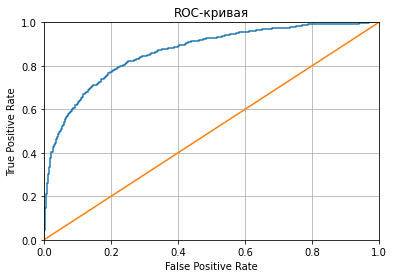

In [29]:
# Построим ROC-кривую для лучшей и дамми моделей
probabilities_one_valid_rfb = rfb_grid_search.best_estimator_.predict_proba(features_test)[:, 1]
fpr_rfb, tpr_rfb, thresholds = roc_curve(target_test, probabilities_one_valid_rfb)
probabilities_one_valid_dum = dummy_model.predict_proba(features_test)[:, 1]
fpr_dum, tpr_dum, thresholds = roc_curve(target_test, probabilities_one_valid_dum)
fig, ax = plt.subplots()
plt.plot(fpr_rfb, tpr_rfb)
plt.plot(fpr_dum, tpr_dum)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
ax.grid()
plt.show()

In [30]:
# Вычислим AUC-ROC для лучшей модели
roc_auc_score(target_test, probabilities_one_valid_rfb)

0.8650644071616987

In [31]:
# И значение F1
print(f1_score(target_test, rfb_grid_search.best_estimator_.predict(features_test)))

0.6273830155979203


### Вывод ###
Полученная лучшая модель случайного леса, на которой было получено значение F1-меры равной 0.59, была сравнена с моделью, возвращающей случайные значения, и моделью, возвращающей наиболее часто встречающейся класс. F1-мера для дамми модели, всегда возвращающей 0 равна 0, так как точность в этом случае тоже будет равна 0.
Сравнивая значения площади под ROC-кривой для лучшей и дамми моделей также видно, что лучшая модель превосходит дамми модель.

## Общий вывод ##
В данном проекте была проведена предобработка данных с таким учетом, чтобы их можно было использовать в моделях классификации. Были обработаны пропуски в данных, удалены незначимыепризнаки.
Были подобраны лучшие гиперпараметры для моделей логистической регрессии, дерева классификации и случайного леса. Эти модели были обучены на данных с дисбалансов классов. Лучшие результаты, равные для F1-меры 0.57 были получены для модели дерева решений.
После устранения дисбаланса классов тремя разными методами была вновь обучена модель случайного леса с новыми гиперпараметрами и получено значения для F1-меры равное 0.62
Лучшая модель была протестирована и сравнена со случайной и дамми моделями. Модель случайного леса показала значительно лучший результат. Помимо этого был построен график для ROC-кривой для лучшей и дамми моделей, измерена площадь под ROC-кривой для лучшей модели.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*